<a href="https://colab.research.google.com/github/Adelakun1999/Age-Gender-detection/blob/master/Age_and_Gender_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix

### Loading the data

In [2]:

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/age_gender.csv')
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [3]:
#The shape of the dataset
df.shape

(23705, 5)

In [4]:
#Dropping the columns that are not useful for us
df = df.drop(['ethnicity','img_name'], axis=1)

In [ ]:
df.head()

,age,gender,pixels
0,1,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,0,202 205 209 210 209 209 210 211 212 214 218 21...


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     23705 non-null  int64 
 1   gender  23705 non-null  int64 
 2   pixels  23705 non-null  object
dtypes: int64(2), object(1)
memory usage: 555.7+ KB


In [5]:
#Checking if there is any missing values
df.isnull().sum()

age       0
gender    0
pixels    0
dtype: int64

<Axes: xlabel='gender', ylabel='count'>

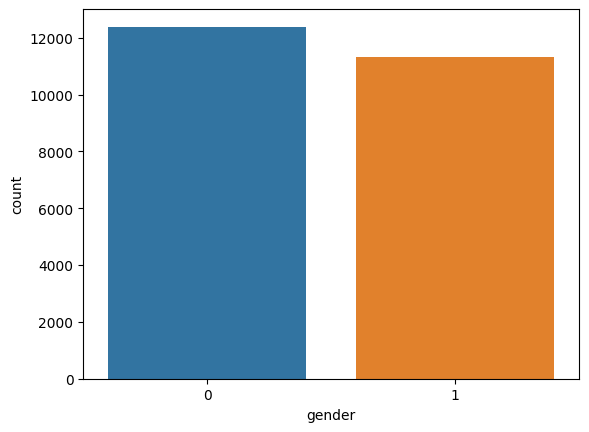

In [61]:
sns.countplot(x='gender', data=df)

# Data Preprocessing


In [6]:
#The image pixels
X = df.drop(['age','gender'], axis=1)

In [ ]:
X.head()

,pixels
0,129 128 128 126 127 130 133 135 139 142 145 14...
1,164 74 111 168 169 171 175 182 184 188 193 199...
2,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,193 197 198 200 199 200 202 203 204 205 208 21...
4,202 205 209 210 209 209 210 211 212 214 218 21...


In [7]:
#Target  Variable
y = df[['age','gender']]

In [9]:
y.head()

,age,gender
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [8]:
y.nunique()

age       104
gender      2
dtype: int64

In [15]:
#The shape of a single image
len(X['pixels'][0].split(' '))

2304

In [16]:
#Reshape data
X = pd.Series(X['pixels'])
X = X.apply(lambda x:x.split(' '))
X = X.apply(lambda x:np.array(list(map(lambda z:np.int(z), x))))
X = np.array(X)
X = np.stack(np.array(X), axis=0)

# reshape data
#X = X.reshape(-1, 48, 48, 1)
#print("X shape: ", X.shape)

In [33]:
X = X.reshape(-1,48,48,1)
print('X shape :', X.shape)

X shape : (23705, 48, 48, 1)


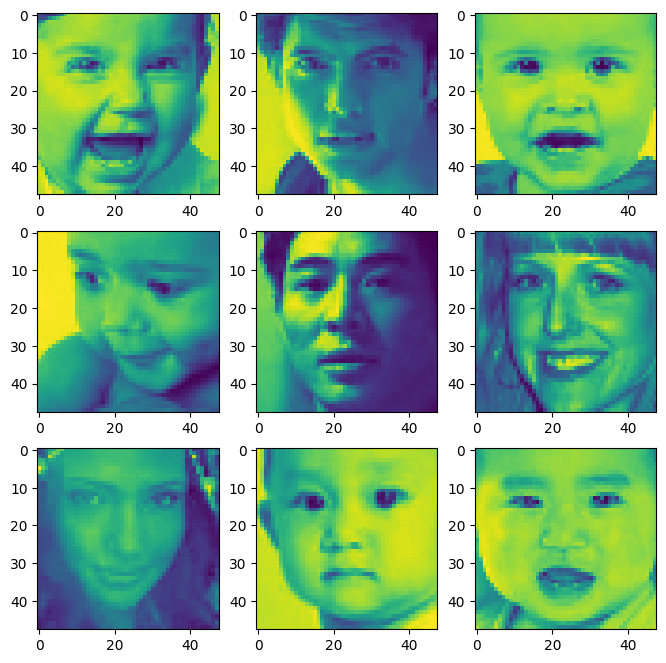

In [45]:
#Generate random images
np.random.seed(42)
plt.figure(figsize=(8,8))
for index,image in enumerate(np.random.randint(0,5000,9)):
  plt.subplot(3,3,index+1)
  plt.imshow(X[image])

In [46]:
def age(x):
  if x < 18:
    return 'Teenager'
  elif (x>=18) and (x<55):
    return 'Middle'
  else:
    return 'Old'

In [51]:
#The age column manipulation
y['age'] = y['age'].apply(lambda x:age(x))

In [52]:
y

,age,gender
0,Teenager,0
1,Teenager,0
2,Teenager,0
3,Teenager,0
4,Teenager,0
...,...,...
23700,Old,1
23701,Old,1
23702,Old,1
23703,Old,1


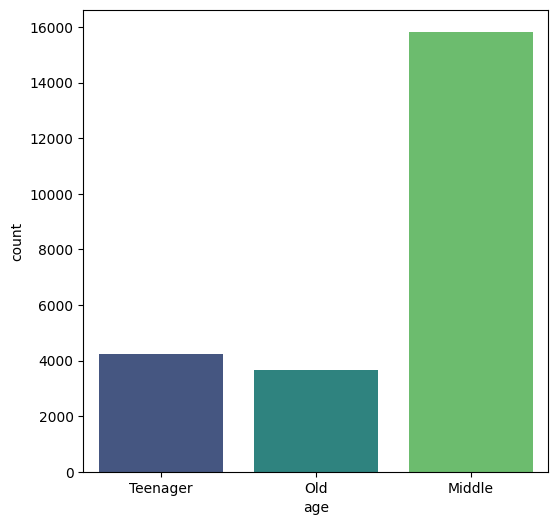

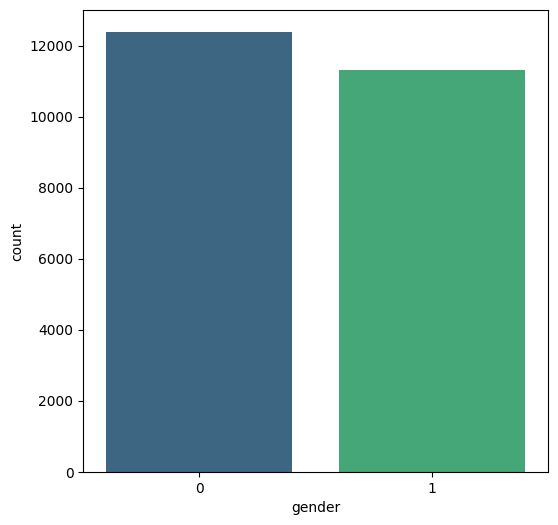

In [53]:
for i in y.columns:
  plt.figure(figsize=(6,6))
  sns.countplot(x=i,data=y, palette='viridis')

In [54]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [55]:
#Encoding the age datasets
y['age_encoded'] = label.fit_transform(y['age'])

In [56]:
print(y['age'].value_counts())
print('--------------------')
print(y['age_encoded'].value_counts())

#Teenager---->2
#Middle --->0
#Old----->1

Middle      15830
Teenager     4233
Old          3642
Name: age, dtype: int64
--------------------
0    15830
2     4233
1     3642
Name: age_encoded, dtype: int64


In [57]:
y.head()

,age,gender,age_encoded
0,Teenager,0,2
1,Teenager,0,2
2,Teenager,0,2
3,Teenager,0,2
4,Teenager,0,2


In [58]:
y['gender']

0        0
1        0
2        0
3        0
4        0
        ..
23700    1
23701    1
23702    1
23703    1
23704    1
Name: gender, Length: 23705, dtype: int64

In [59]:
#Converting the age dataset into numpy array
age = y['age_encoded'].values

In [84]:
age

array([2, 2, 2, ..., 1, 1, 1])

In [60]:
np.unique(age)

array([0, 1, 2])

In [85]:
#Converting the gender dataset into numpy array
gender = y['gender'].values

In [86]:
gender

array([0, 0, 0, ..., 1, 1, 1])

In [87]:
#Categorizing target Variable
from tensorflow.keras.utils import to_categorical

In [88]:
#Categorizing the age column into three classes
age_cat = to_categorical(age)

In [ ]:
age_cat.shape

(23705, 3)

In [90]:
print(age)

[2 2 2 ... 1 1 1]


In [89]:
print(age_cat)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [92]:
# Scaling the image data
X =X/255

In [95]:
X.max()

1.0

In [96]:
age_cat

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [97]:
#image genrator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [98]:
image_gen = ImageDataGenerator(rotation_range=5, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )


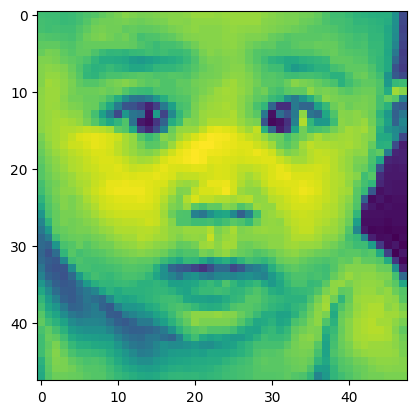

In [99]:
plt.imshow(X[0])

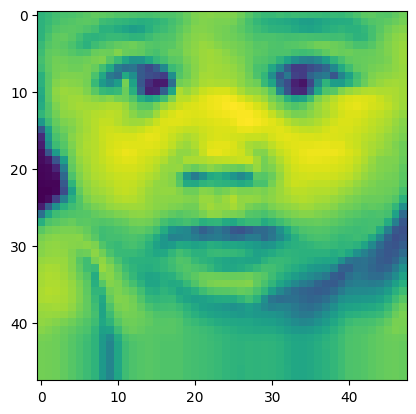

In [100]:
plt.imshow(image_gen.random_transform(X[0]))

In [101]:
#Splitting the data into train test split
from sklearn.model_selection import train_test_split

In [102]:
#Age
X_train_age, X_test_age,y_train_age,y_test_age = train_test_split(X,age_cat,test_size=0.2,
                                                                  random_state=101)

#Gender
X_train_gender, X_test_gender,y_train_gender,y_test_gender = train_test_split(X,gender,test_size=0.2,
                                                                  random_state=101)

In [103]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D,Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [126]:
gender.shape

(23705,)

## Model Building

In [105]:
#Building The CNN model
def build_cnn(number_classes,loss,activation):
  model = Sequential()
  model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(48,48,1),activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))

  model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(48,48,1),activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))

  model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(48,48,1),activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))

  model.add(Flatten())
  model.add(Dense(256,activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(number_classes,activation))

  model.compile(optimizer='adam',loss=loss,
                metrics=['accuracy'])

  return model



In [106]:
#Adding early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss',patience=10)

## Model Training on the age dataset

In [113]:
#Age Prediction
model_age = build_cnn(3,'categorical_crossentropy','softmax')
model_age.fit(x=X_train_age,y=y_train_age,epochs=10,validation_data=(X_test_age,y_test_age),
              callbacks=[early_stop],batch_size=64)

Epoch 1/10
297/297 [==============================] - 6s 8ms/step - loss: 0.6768 - accuracy: 0.7373 - val_loss: 0.5130 - val_accuracy: 0.8059
Epoch 2/10
297/297 [==============================] - 2s 7ms/step - loss: 0.4785 - accuracy: 0.8200 - val_loss: 0.4196 - val_accuracy: 0.8426
Epoch 3/10
297/297 [==============================] - 2s 7ms/step - loss: 0.4148 - accuracy: 0.8432 - val_loss: 0.3870 - val_accuracy: 0.8580
Epoch 4/10
297/297 [==============================] - 2s 7ms/step - loss: 0.3757 - accuracy: 0.8583 - val_loss: 0.3586 - val_accuracy: 0.8669
Epoch 5/10
297/297 [==============================] - 2s 8ms/step - loss: 0.3435 - accuracy: 0.8683 - val_loss: 0.3454 - val_accuracy: 0.8701
Epoch 6/10
297/297 [==============================] - 2s 7ms/step - loss: 0.3271 - accuracy: 0.8754 - val_loss: 0.3426 - val_accuracy: 0.8728
Epoch 7/10
297/297 [==============================] - 2s 7ms/step - loss: 0.3023 - accuracy: 0.8839 - val_loss: 0.3232 - val_accuracy: 0.8798
Epoch 

In [114]:
model_age.metrics_names

['loss', 'accuracy']

In [115]:
losses_age = pd.DataFrame(model_age.history.history)

In [116]:
losses_age

,loss,accuracy,val_loss,val_accuracy
0,0.676818,0.737344,0.512981,0.805948
1,0.478516,0.819975,0.419592,0.842649
2,0.414780,0.843177,0.387023,0.858047
3,0.375699,0.858258,0.358590,0.866906
4,0.343464,0.868277,0.345439,0.870070
5,0.327058,0.875395,0.342605,0.872812
6,0.302301,0.883885,0.323214,0.879772
7,0.286120,0.892533,0.340867,0.869859
8,0.265221,0.898756,0.341861,0.874921
9,0.250825,0.905663,0.318489,0.880405


Text(0.5, 1.0, 'loss vs val_loss')

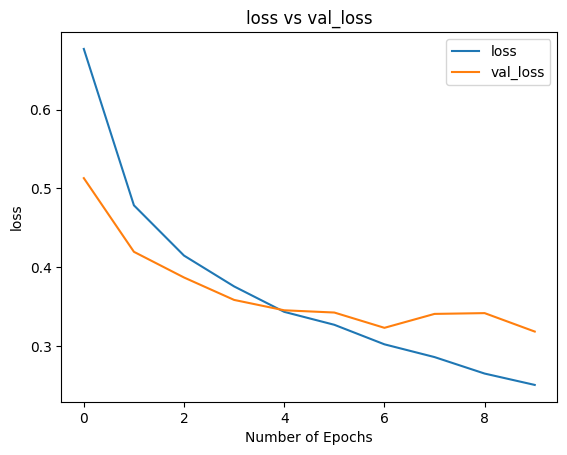

In [117]:
losses_age[['loss','val_loss']].plot()
plt.xlabel('Number of Epochs')
plt.ylabel('loss')
plt.title('loss vs val_loss')

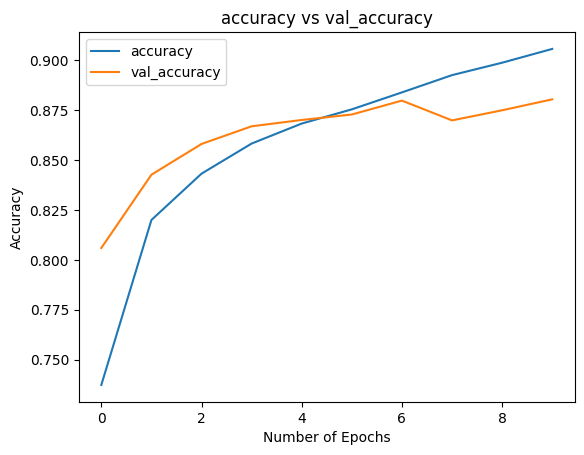

In [118]:
losses_age[['accuracy','val_accuracy']].plot()
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('accuracy vs val_accuracy')
plt.show()


In [121]:
model_age.evaluate(X_test_age,y_test_age)

149/149 [==============================] - 1s 4ms/step - loss: 0.3185 - accuracy: 0.8804


[0.31848883628845215, 0.8804049491882324]

In [119]:
#Evaluation on the test_age

model_age.metrics_names
loss_age,accuracy_age = model_age.evaluate(X_test_age,y_test_age, verbose=0)
print('loss : {}'.format(loss_age))
print('Accuracy : {}'.format(accuracy_age))

loss : 0.31848883628845215
Accuracy : 0.8804049491882324


In [122]:
#Prediction
prediction = model_age.predict(X_test_age)

149/149 [==============================] - 0s 2ms/step


In [127]:
X_test_age.shape

(4741, 48, 48, 1)

In [129]:
X[0].shape

(48, 48, 1)

In [136]:
np.argmax(model_age.predict(X[5000].reshape(1,48,48,1)))

1/1 [==============================] - 0s 20ms/step


0

In [137]:
df['age'][5000]

24

In [138]:
np.argmax(prediction[0])

0

In [139]:

prediction =[np.argmax(i) for i in prediction]

In [140]:
np.argmax(y_test_age[7])

1

In [141]:
true = [np.argmax(i) for i in y_test_age]

In [145]:
print(classification_report(true,prediction))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      3150
           1       0.74      0.68      0.71       711
           2       0.96      0.83      0.89       880

    accuracy                           0.88      4741
   macro avg       0.86      0.82      0.84      4741
weighted avg       0.88      0.88      0.88      4741



##Model training on the gender dataset




In [149]:
model_gender=build_cnn(1,'binary_crossentropy','sigmoid')
model_gender.fit(x=X_train_gender,y=y_train_gender,epochs=10,
                 validation_data=(X_test_gender,y_test_gender),
                 callbacks=[early_stop],batch_size=32)


Epoch 1/10
593/593 [==============================] - 7s 6ms/step - loss: 0.4547 - accuracy: 0.7796 - val_loss: 0.3468 - val_accuracy: 0.8545
Epoch 2/10
593/593 [==============================] - 3s 5ms/step - loss: 0.3203 - accuracy: 0.8607 - val_loss: 0.2926 - val_accuracy: 0.8724
Epoch 3/10
593/593 [==============================] - 3s 5ms/step - loss: 0.2844 - accuracy: 0.8744 - val_loss: 0.2758 - val_accuracy: 0.8804
Epoch 4/10
593/593 [==============================] - 4s 7ms/step - loss: 0.2580 - accuracy: 0.8895 - val_loss: 0.2666 - val_accuracy: 0.8859
Epoch 5/10
593/593 [==============================] - 4s 7ms/step - loss: 0.2418 - accuracy: 0.8952 - val_loss: 0.2599 - val_accuracy: 0.8874
Epoch 6/10
593/593 [==============================] - 3s 5ms/step - loss: 0.2280 - accuracy: 0.9018 - val_loss: 0.3059 - val_accuracy: 0.8610
Epoch 7/10
593/593 [==============================] - 3s 6ms/step - loss: 0.2137 - accuracy: 0.9094 - val_loss: 0.2891 - val_accuracy: 0.8760
Epoch 

In [150]:
losses_gender = pd.DataFrame(model_gender.history.history)


Text(0.5, 1.0, 'loss vs val_loss')

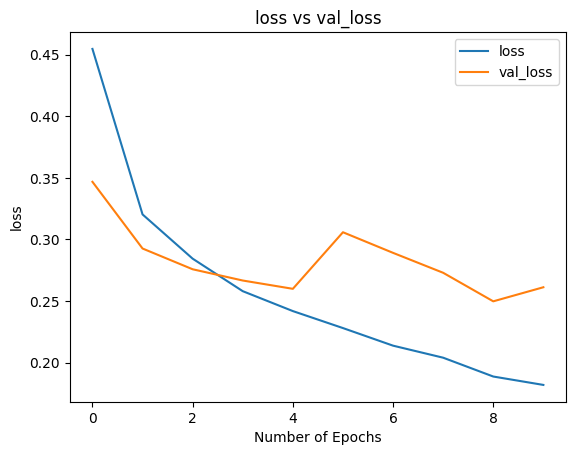

In [151]:
losses_gender[['loss','val_loss']].plot()
plt.xlabel('Number of Epochs')
plt.ylabel('loss')
plt.title('loss vs val_loss')

Text(0.5, 1.0, 'accuracy vs val_accuracy')

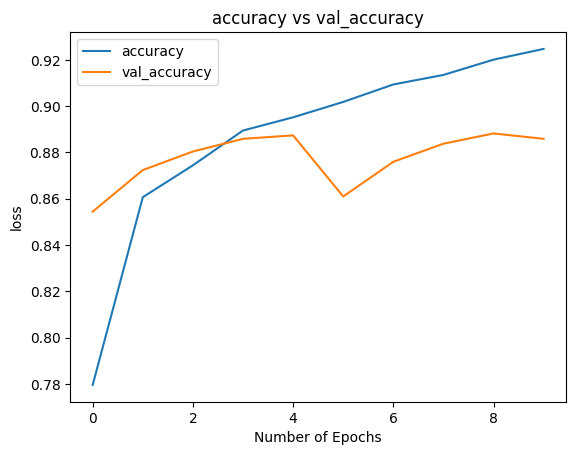

In [152]:
losses_gender[['accuracy','val_accuracy']].plot()
plt.xlabel('Number of Epochs')
plt.ylabel('loss')
plt.title('accuracy vs val_accuracy')


In [153]:
loss_gender, accuracy_gender = model_gender.evaluate(X_test_gender,y_test_gender)
print('loss : {}'.format(loss_gender))
print('Accuracy : {}'.format(accuracy_gender))

149/149 [==============================] - 1s 4ms/step - loss: 0.2612 - accuracy: 0.8859
loss : 0.2611800730228424
Accuracy : 0.8858890533447266


In [154]:
prediction_gender = model_gender.predict(X_test_gender)

149/149 [==============================] - 0s 3ms/step


In [155]:
prediction_= (prediction_gender>0.5)

In [156]:
prediction_.shape

(4741, 1)

In [157]:
y_test_gender.shape

(4741,)

In [158]:
from sklearn.metrics import classification_report, confusion_matrix

In [159]:
print(classification_report(y_test_gender,prediction_))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2469
           1       0.87      0.90      0.88      2272

    accuracy                           0.89      4741
   macro avg       0.89      0.89      0.89      4741
weighted avg       0.89      0.89      0.89      4741



In [160]:
confusion_matrix(y_test_gender,prediction_)

array([[2153,  316],
       [ 225, 2047]])

In [161]:
from tensorflow.keras.models import load_model

In [162]:
model_age.save('age.h5')

In [163]:
model_gender.save('gender.h5')